In [1]:
import util

data = util.read_latest_dataset()

In [3]:
print(f'There are {data.shape[0]} publications.')
data

There are 2573 publications.


,titulo,descricao,data_hora,dia_semana,periodo_dia,imagens,acessos,acessos_medio_hora,tem_imagem_perfil
0,Divulgadas notas do Enem 2022,Participantes podem consultar pelo site do Ine...,2023-02-09 11:35:00,quinta,manha,1,123.0,12.90,sim
1,Divulgado edital de bolsas para mestrado e dou...,As vagas são para docentes e técnicos administ...,2023-02-07 08:21:00,terca,manha,1,224.0,3.69,sim
2,Divulgado edital de liberação de docentes para...,Interessados podem se inscrever entre os dias ...,2023-02-06 10:41:00,segunda,manha,1,168.0,2.04,sim
3,Últimos dias para se inscrever na seleção de m...,Documento altera formulário de autoavaliação d...,2023-02-02 09:49:00,quinta,manha,1,1175.0,6.55,sim
4,Confira resultado preliminar para movimentação...,Vaga é para o cargo de técnico em Contabilidad...,2023-02-03 10:32:00,sexta,manha,1,317.0,2.05,sim
...,...,...,...,...,...,...,...,...,...
2568,Divulgado o edital do processo seletivo de cur...,Instituto Federal Goiano (IF Goiano) divulga e...,2015-08-06 16:00:00,quinta,tarde,1,1289.0,0.02,nao
2569,Colégio de Dirigentes divulga nota sobre orçam...,NaN,2015-08-06 15:53:00,quinta,tarde,1,914.0,0.01,nao
2570,Divulgado resultado final dos JIF - Etapa IF G...,Evento ocorreu no Câmpus Urutaí entre os dias ...,2015-06-25 15:51:00,quinta,tarde,2,2227.0,0.03,sim
2571,Aberta seleção para professor temporário,Inscrições serão feitas pela internet entre 25...,2015-06-25 15:46:00,quinta,tarde,1,1191.0,0.02,sim


# Quantidade de publicações

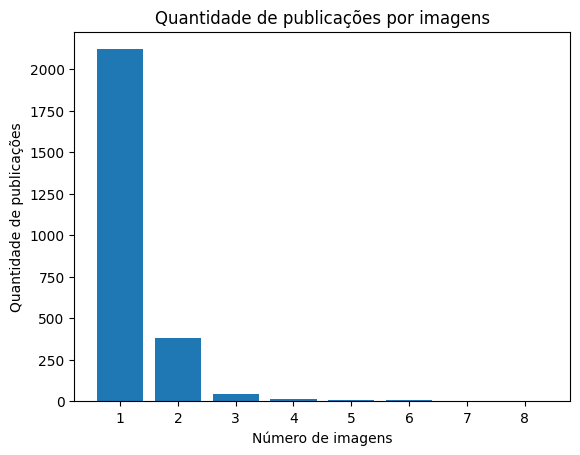

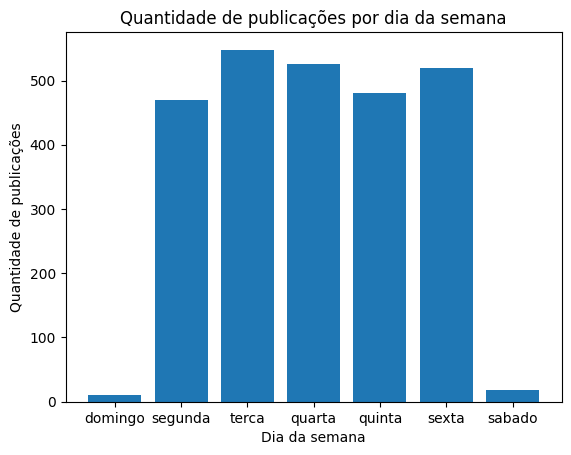

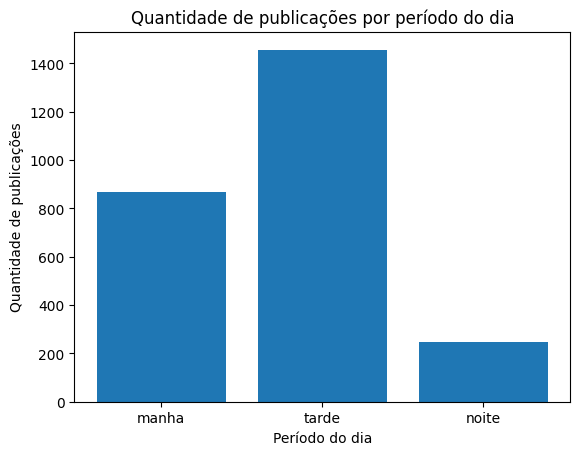

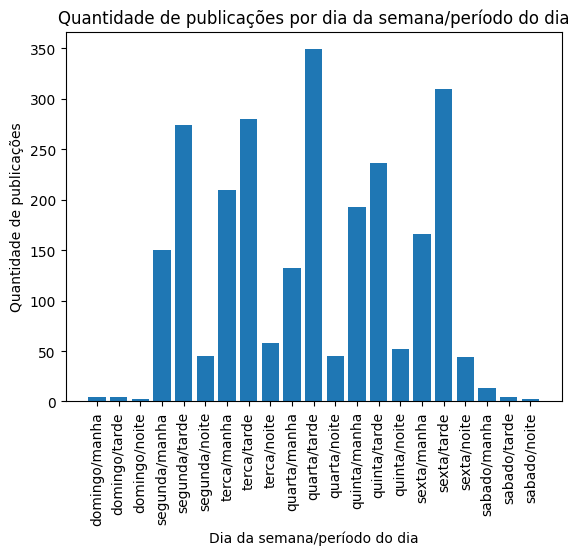

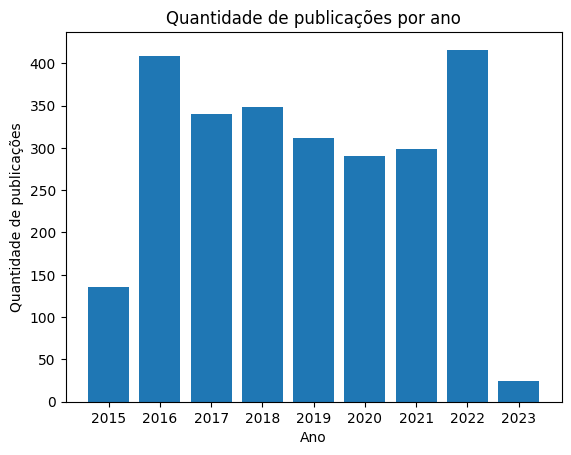

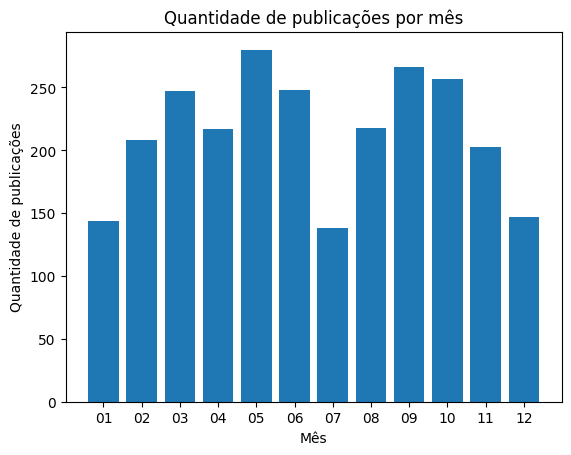

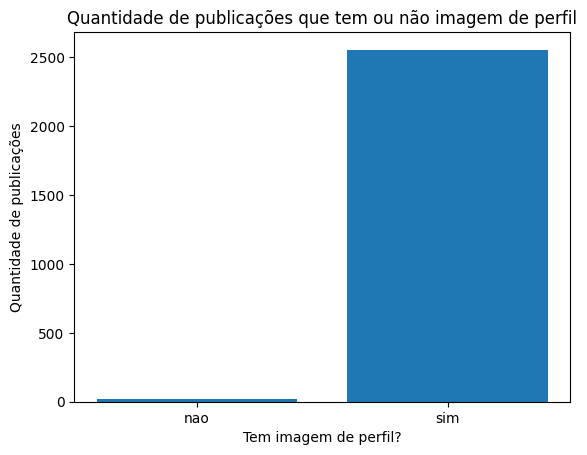

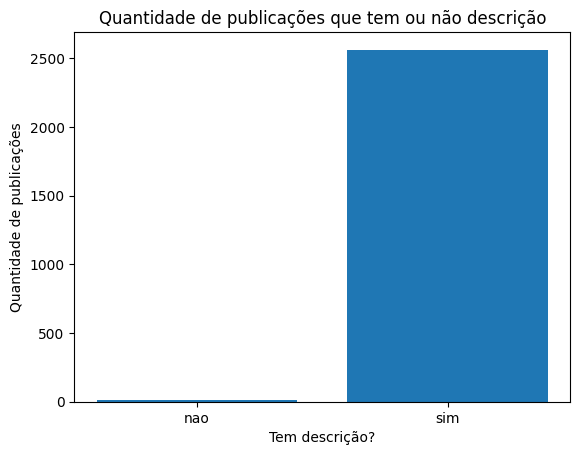

In [38]:
from matplotlib import pyplot
import pandas as pd
import util


chart_data = list()

qtd_per_images = data[['titulo', 'imagens']].groupby('imagens').count().reset_index().sort_values('titulo')

qtd_per_images_dict = {
    'dataset': qtd_per_images,
    'kind': 'bar',
    'x_label': 'Número de imagens',
    'y_label': 'Quantidade de publicações',
    'x_col': 'imagens',
    'y_col': 'titulo',
    'title': 'Quantidade de publicações por imagens'
}
chart_data.append(qtd_per_images_dict)

qtd_per_weekday = data[['titulo', 'dia_semana']].groupby('dia_semana').count().reset_index().sort_values('titulo')
qtd_per_weekday['dia_semana_num'] = qtd_per_weekday['dia_semana'].apply(util.weekday_to_num)
qtd_per_weekday = qtd_per_weekday.sort_values('dia_semana_num')

qtd_per_weekday_dict = {
    'dataset': qtd_per_weekday,
    'kind': 'bar',
    'x_label': 'Dia da semana',
    'y_label': 'Quantidade de publicações',
    'x_col': 'dia_semana',
    'y_col': 'titulo',
    'title': 'Quantidade de publicações por dia da semana'
}
chart_data.append(qtd_per_weekday_dict)

qtd_per_day_period = data[['titulo', 'periodo_dia']].groupby('periodo_dia').count().reset_index().sort_values('titulo')
qtd_per_day_period['periodo_dia_num'] = qtd_per_day_period['periodo_dia'].apply(util.day_period_to_num)
qtd_per_day_period = qtd_per_day_period.sort_values('periodo_dia_num')

qtd_per_day_period_dict = {
    'dataset': qtd_per_day_period,
    'kind': 'bar',
    'x_label': 'Período do dia',
    'y_label': 'Quantidade de publicações',
    'x_col': 'periodo_dia',
    'y_col': 'titulo',
    'title': 'Quantidade de publicações por período do dia'
}
chart_data.append(qtd_per_day_period_dict)

qtd_per_weekday_day_period = data[['titulo', 'dia_semana', 'periodo_dia']].groupby(['dia_semana', 'periodo_dia']).count().reset_index().sort_values('titulo')
qtd_per_weekday_day_period['dia_semana_periodo_dia'] = qtd_per_weekday_day_period['dia_semana'] + '/' + qtd_per_weekday_day_period['periodo_dia']
qtd_per_weekday_day_period['dia_semana_periodo_dia_num'] = qtd_per_weekday_day_period['dia_semana_periodo_dia'].apply(util.weekday_day_period_to_num)
qtd_per_weekday_day_period = qtd_per_weekday_day_period.sort_values('dia_semana_periodo_dia_num')

qtd_per_weekday_day_period_dict = {
    'dataset': qtd_per_weekday_day_period,
    'kind': 'bar',
    'x_label': 'Dia da semana/período do dia',
    'y_label': 'Quantidade de publicações',
    'x_col': 'dia_semana_periodo_dia',
    'y_col': 'titulo',
    'title': 'Quantidade de publicações por dia da semana/período do dia',
    'rotation': 90
}
chart_data.append(qtd_per_weekday_day_period_dict)

data['ano'] = data['data_hora'].dt.strftime('%Y')

qtd_per_year = data[['titulo', 'ano']].groupby('ano').count().reset_index()  #.sort_values('titulo')
qtd_per_year_dict = {
    'dataset': qtd_per_year,
    'kind': 'bar',
    'x_label': 'Ano',
    'y_label': 'Quantidade de publicações',
    'x_col': 'ano',
    'y_col': 'titulo',
    'title': 'Quantidade de publicações por ano'
}
chart_data.append(qtd_per_year_dict)

data['mes'] = data['data_hora'].dt.strftime('%m')

qtd_per_month = data[['titulo', 'mes']].groupby('mes').count().reset_index()  #.sort_values('titulo')
qtd_per_month_dict = {
    'dataset': qtd_per_month,
    'kind': 'bar',
    'x_label': 'Mês',
    'y_label': 'Quantidade de publicações',
    'x_col': 'mes',
    'y_col': 'titulo',
    'title': 'Quantidade de publicações por mês'
}
chart_data.append(qtd_per_month_dict)

qtd_per_profile_img = data[['titulo', 'tem_imagem_perfil']].groupby('tem_imagem_perfil').count().reset_index().sort_values('titulo')
qtd_per_profile_img_dict = {
    'dataset': qtd_per_profile_img,
    'kind': 'bar',
    'x_label': 'Tem imagem de perfil?',
    'y_label': 'Quantidade de publicações',
    'x_col': 'tem_imagem_perfil',
    'y_col': 'titulo',
    'title': 'Quantidade de publicações que tem ou não imagem de perfil'
}
chart_data.append(qtd_per_profile_img_dict)

data['tem_desc'] = data['descricao'].apply(lambda desc: 'nao' if pd.isna(desc) else 'sim')

qtd_per_desc = data[['titulo', 'tem_desc']].groupby('tem_desc').count().reset_index().sort_values('titulo')
qtd_per_desc_dict = {
    'dataset': qtd_per_desc,
    'kind': 'bar',
    'x_label': 'Tem descrição?',
    'y_label': 'Quantidade de publicações',
    'x_col': 'tem_desc',
    'y_col': 'titulo',
    'title': 'Quantidade de publicações que tem ou não descrição'
}
chart_data.append(qtd_per_desc_dict)

for chart_dt in chart_data:
    rotation =  chart_dt['rotation'] if 'rotation' in chart_dt else None
    util.chart(
        kind=chart_dt['kind'],
        dataset=chart_dt['dataset'],
        x_label=chart_dt['x_label'],
        y_label=chart_dt['y_label'],
        x_col=chart_dt['x_col'],
        y_col=chart_dt['y_col'],
        title=chart_dt['title'],
        path=util.CHART_PATH + 'latest_dataset/quantity',
        rotation=rotation
    )

# Soma de acessos

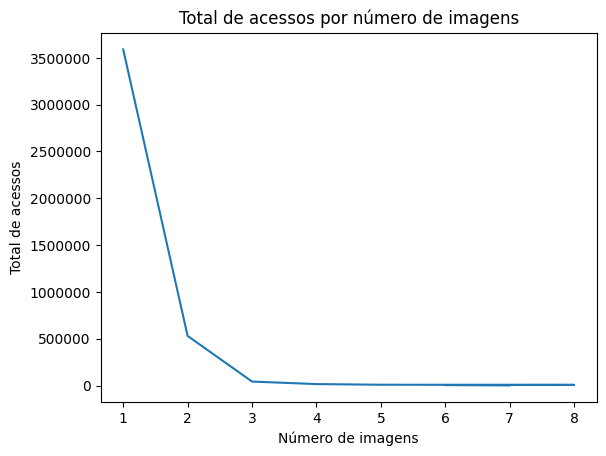

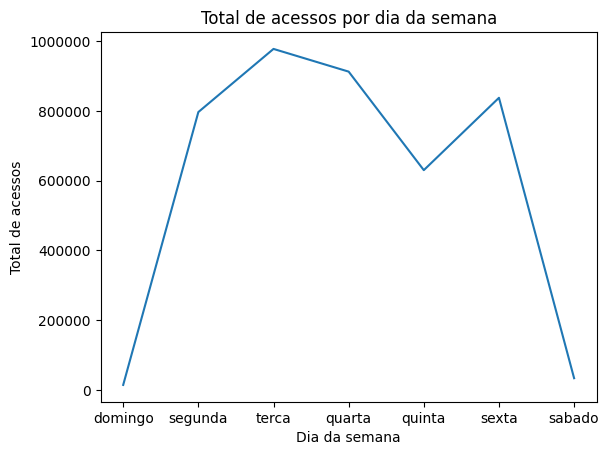

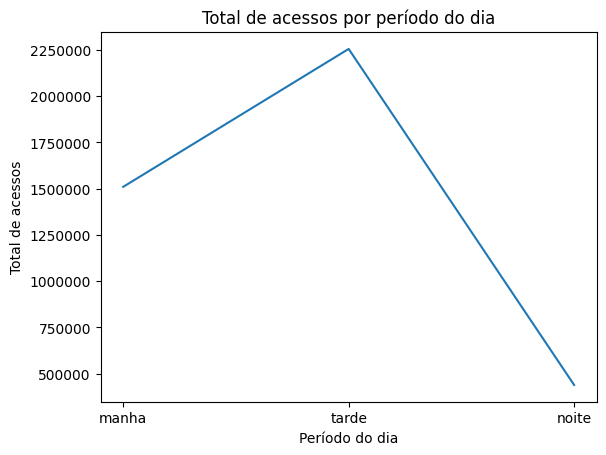

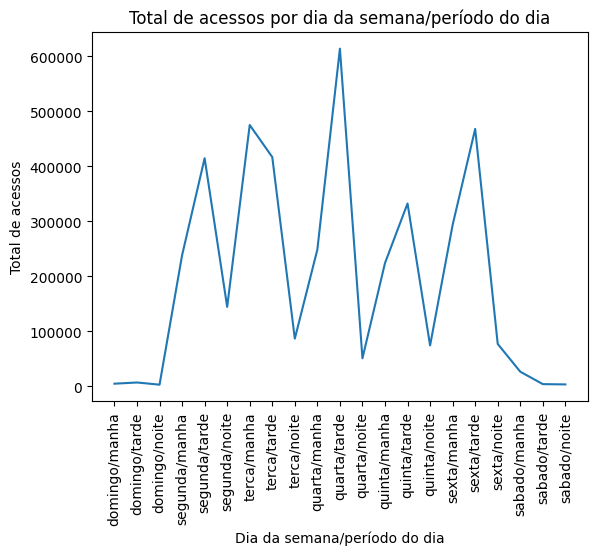

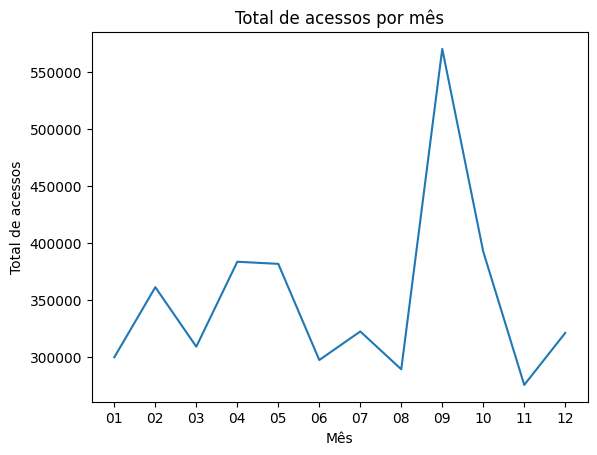

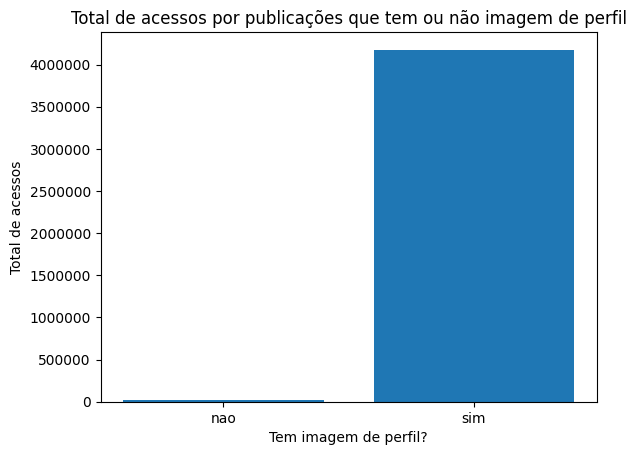

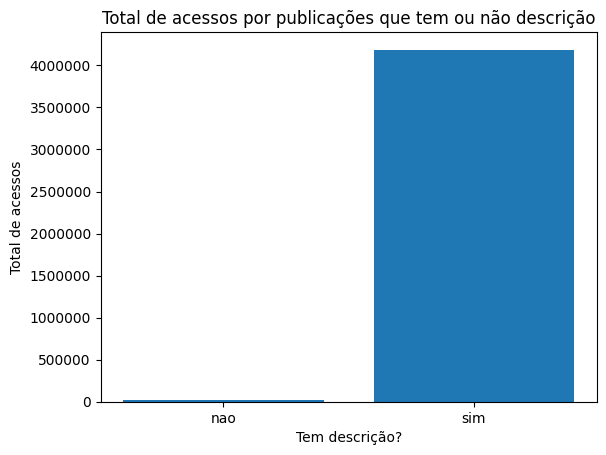

In [39]:
from matplotlib import pyplot
import pandas as pd


chart_data = list()

sum_per_images = data[['acessos', 'imagens']].groupby('imagens').sum().reset_index().sort_values('acessos')
sum_per_images_dict = {
    'dataset': sum_per_images,
    'kind': 'plot',
    'x_label': 'Número de imagens',
    'y_label': 'Total de acessos',
    'x_col': 'imagens',
    'y_col': 'acessos',
    'title': 'Total de acessos por número de imagens'
}
chart_data.append(sum_per_images_dict)

sum_per_weekday = data[['acessos', 'dia_semana']].groupby('dia_semana').sum().reset_index().sort_values('acessos')
sum_per_weekday['dia_semana_num'] = sum_per_weekday['dia_semana'].apply(util.weekday_to_num)
sum_per_weekday = sum_per_weekday.sort_values('dia_semana_num')

sum_per_weekday_dict = {
    'dataset': sum_per_weekday,
    'kind': 'plot',
    'x_label': 'Dia da semana',
    'y_label': 'Total de acessos',
    'x_col': 'dia_semana',
    'y_col': 'acessos',
    'title': 'Total de acessos por dia da semana'
}
chart_data.append(sum_per_weekday_dict)

sum_per_day_period = data[['acessos', 'periodo_dia']].groupby('periodo_dia').sum().reset_index().sort_values('acessos')
sum_per_day_period['periodo_dia_num'] = sum_per_day_period['periodo_dia'].apply(util.day_period_to_num)
sum_per_day_period = sum_per_day_period.sort_values('periodo_dia_num')

sum_per_day_period_dict = {
    'dataset': sum_per_day_period,
    'kind': 'plot',
    'x_label': 'Período do dia',
    'y_label': 'Total de acessos',
    'x_col': 'periodo_dia',
    'y_col': 'acessos',
    'title': 'Total de acessos por período do dia'
}
chart_data.append(sum_per_day_period_dict)

sum_per_weekday_day_period = data[['acessos', 'dia_semana', 'periodo_dia']].groupby(['dia_semana', 'periodo_dia']).sum().reset_index().sort_values('acessos')
sum_per_weekday_day_period['dia_semana_periodo_dia'] = sum_per_weekday_day_period['dia_semana'] + '/' + sum_per_weekday_day_period['periodo_dia']
sum_per_weekday_day_period['dia_semana_periodo_dia_num'] = sum_per_weekday_day_period['dia_semana_periodo_dia'].apply(util.weekday_day_period_to_num)
sum_per_weekday_day_period = sum_per_weekday_day_period.sort_values('dia_semana_periodo_dia_num')

sum_per_weekday_day_period_dict = {
    'dataset': sum_per_weekday_day_period,
    'kind': 'plot',
    'x_label': 'Dia da semana/período do dia',
    'y_label': 'Total de acessos',
    'x_col': 'dia_semana_periodo_dia',
    'y_col': 'acessos',
    'title': 'Total de acessos por dia da semana/período do dia',
    'rotation': 90
}
chart_data.append(sum_per_weekday_day_period_dict)

data['mes'] = data['data_hora'].dt.strftime('%m')

sum_per_month = data[['acessos', 'mes']].groupby('mes').sum().reset_index()  #.sort_values('titulo')
sum_per_month_dict = {
    'dataset': sum_per_month,
    'kind': 'plot',
    'x_label': 'Mês',
    'y_label': 'Total de acessos',
    'x_col': 'mes',
    'y_col': 'acessos',
    'title': 'Total de acessos por mês'
}
chart_data.append(sum_per_month_dict)

sum_per_profile_img = data[['acessos', 'tem_imagem_perfil']].groupby('tem_imagem_perfil').sum().reset_index().sort_values('acessos')
sum_per_profile_img_dict = {
    'dataset': sum_per_profile_img,
    'kind': 'bar',
    'x_label': 'Tem imagem de perfil?',
    'y_label': 'Total de acessos',
    'x_col': 'tem_imagem_perfil',
    'y_col': 'acessos',
    'title': 'Total de acessos por publicações que tem ou não imagem de perfil'
}
chart_data.append(sum_per_profile_img_dict)

data['tem_desc'] = data['descricao'].apply(lambda desc: 'nao' if pd.isna(desc) else 'sim')

sum_per_desc = data[['acessos', 'tem_desc']].groupby('tem_desc').sum().reset_index().sort_values('acessos')
sum_per_desc_dict = {
    'dataset': sum_per_desc,
    'kind': 'bar',
    'x_label': 'Tem descrição?',
    'y_label': 'Total de acessos',
    'x_col': 'tem_desc',
    'y_col': 'acessos',
    'title': 'Total de acessos por publicações que tem ou não descrição'
}
chart_data.append(sum_per_desc_dict)

for chart_dt in chart_data:
    rotation =  chart_dt['rotation'] if 'rotation' in chart_dt else None
    util.chart(
        kind=chart_dt['kind'],
        dataset=chart_dt['dataset'],
        x_label=chart_dt['x_label'],
        y_label=chart_dt['y_label'],
        x_col=chart_dt['x_col'],
        y_col=chart_dt['y_col'],
        title=chart_dt['title'],
        path=util.CHART_PATH + 'latest_dataset/sum',
        rotation=rotation
    )

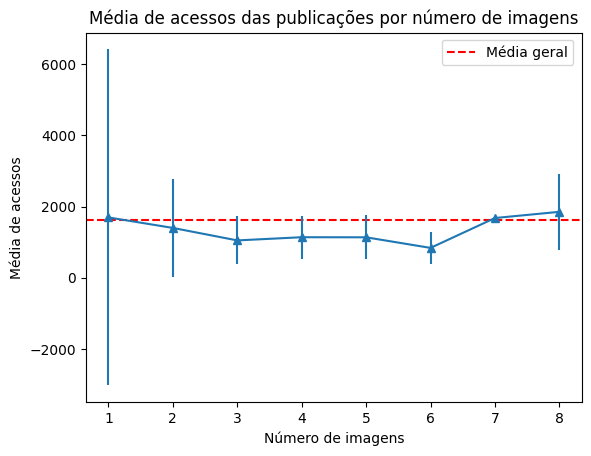

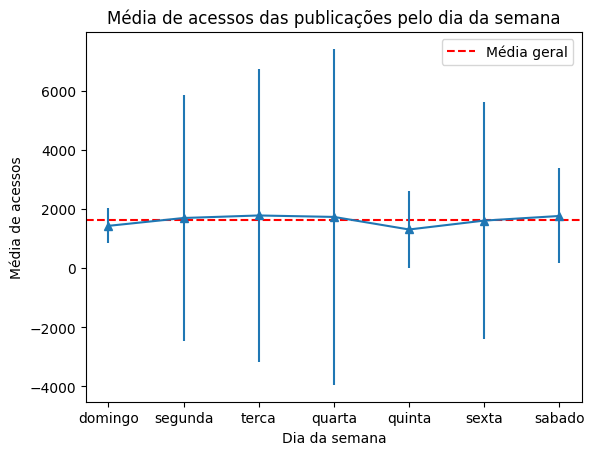

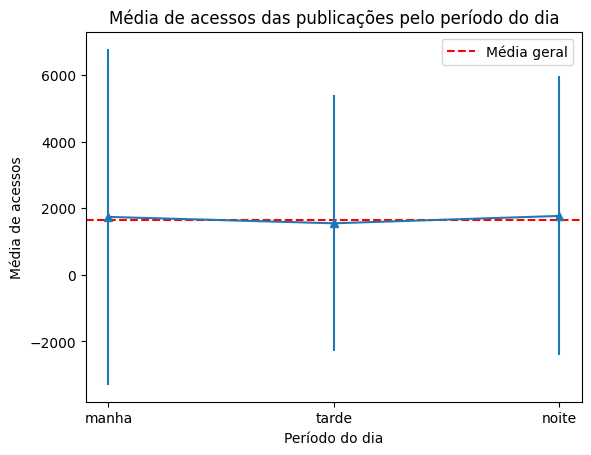

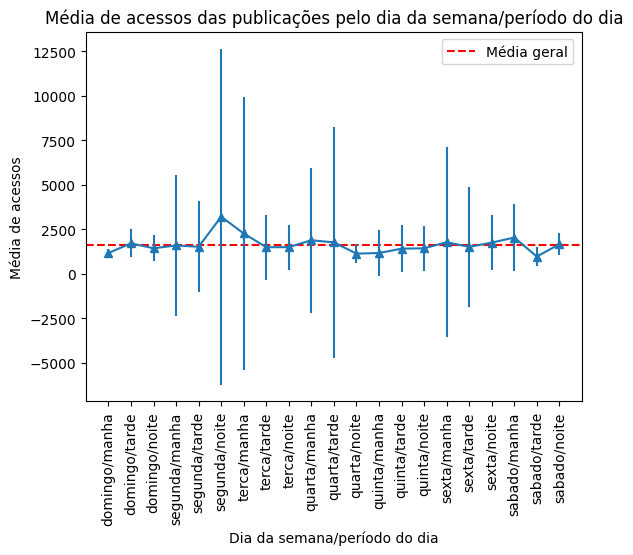

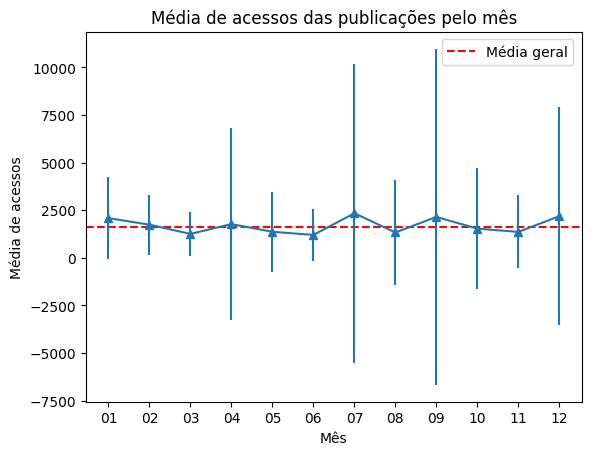

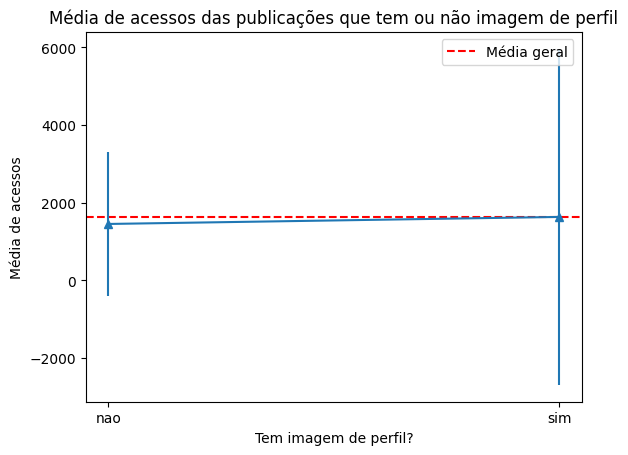

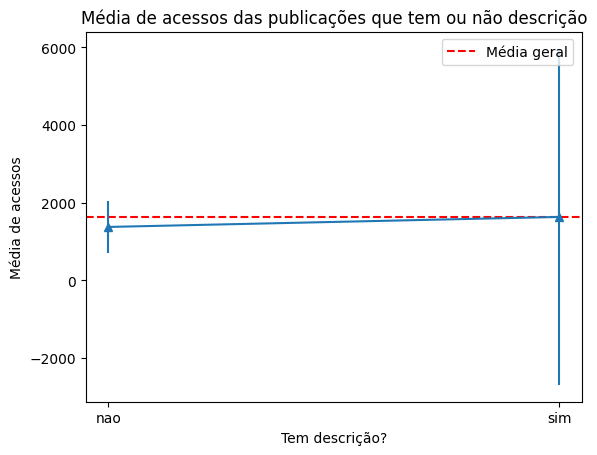

In [40]:
from matplotlib import pyplot
import pandas as pd
import util
import numpy as nm


chart_data = list()
access_general_mean = data['acessos'].mean()

mean_per_images = data[['acessos', 'imagens']].groupby('imagens').mean().reset_index()
mean_per_images.columns = ['imagens', 'media_acessos']
std_per_images = data[['acessos', 'imagens']].groupby('imagens').std().reset_index()['acessos']
mean_std_per_images = mean_per_images.join(std_per_images)
mean_std_per_images.columns = ['imagens', 'media_acessos', 'std']
mean_std_per_images_dict = {
    'dataset': mean_std_per_images,
    'x_label': 'Número de imagens',
    'y_label': 'Média de acessos',
    'x_col': 'imagens',
    'y_col': 'media_acessos',
    'title': 'Média de acessos das publicações por número de imagens'
}
chart_data.append(mean_std_per_images_dict)

mean_per_weekday = data[['acessos', 'dia_semana']].groupby('dia_semana').mean().reset_index()
mean_per_weekday.columns = ['dia_semana', 'media_acessos'] 
std_per_weekday = data[['acessos', 'dia_semana']].groupby('dia_semana').std().reset_index()['acessos']
mean_std_per_weekday = mean_per_weekday.join(std_per_weekday)
mean_std_per_weekday.columns = ['dia_semana', 'media_acessos', 'std']   

mean_std_per_weekday['dia_semana_num'] = mean_std_per_weekday['dia_semana'].apply(util.weekday_to_num)
mean_std_per_weekday = mean_std_per_weekday.sort_values('dia_semana_num')

mean_std_per_weekday_dict = {
    'dataset': mean_std_per_weekday,
    'x_label': 'Dia da semana',
    'y_label': 'Média de acessos',
    'x_col': 'dia_semana',
    'y_col': 'media_acessos',
    'title': 'Média de acessos das publicações pelo dia da semana'
}
chart_data.append(mean_std_per_weekday_dict)

mean_per_day_period = data[['acessos', 'periodo_dia']].groupby('periodo_dia').mean().reset_index()
mean_per_day_period.columns = ['periodo_dia', 'media_acessos']
std_per_day_period = data[['acessos', 'periodo_dia']].groupby('periodo_dia').std().reset_index()['acessos']
mean_std_per_day_period = mean_per_day_period.join(std_per_day_period)
mean_std_per_day_period.columns = ['periodo_dia', 'media_acessos', 'std']
        
mean_std_per_day_period['periodo_dia_num'] = mean_std_per_day_period['periodo_dia'].apply(util.day_period_to_num)
mean_std_per_day_period = mean_std_per_day_period.sort_values('periodo_dia_num')

mean_std_per_day_period_dict = {
    'dataset': mean_std_per_day_period,
    'x_label': 'Período do dia',
    'y_label': 'Média de acessos',
    'x_col': 'periodo_dia',
    'y_col': 'media_acessos',
    'title': 'Média de acessos das publicações pelo período do dia'
}
chart_data.append(mean_std_per_day_period_dict)

mean_per_weekday_day_period = data[['acessos', 'dia_semana', 'periodo_dia']].groupby(['dia_semana', 'periodo_dia']).mean().reset_index()
mean_per_weekday_day_period.columns = ['dia_semana', 'periodo_dia', 'media_acessos']
std_per_weekday_day_period = data[['acessos', 'dia_semana', 'periodo_dia']].groupby(['dia_semana', 'periodo_dia']).std().reset_index()['acessos']
mean_per_weekday_day_period = mean_per_weekday_day_period.join(std_per_weekday_day_period)
mean_per_weekday_day_period.columns = ['dia_semana', 'periodo_dia', 'media_acessos', 'std']
mean_per_weekday_day_period['dia_semana_periodo_dia'] = mean_per_weekday_day_period['dia_semana'] + '/' + mean_per_weekday_day_period['periodo_dia']
mean_per_weekday_day_period = mean_per_weekday_day_period.drop(['dia_semana', 'periodo_dia'], axis=1)
mean_per_weekday_day_period['dia_semana_periodo_dia_num'] = mean_per_weekday_day_period['dia_semana_periodo_dia'].apply(util.weekday_day_period_to_num)
mean_per_weekday_day_period = mean_per_weekday_day_period.sort_values('dia_semana_periodo_dia_num')
mean_per_weekday_day_period_dict = {
    'dataset': mean_per_weekday_day_period,
    'x_label': 'Dia da semana/período do dia',
    'y_label': 'Média de acessos',
    'x_col': 'dia_semana_periodo_dia',
    'y_col': 'media_acessos',
    'title': 'Média de acessos das publicações pelo dia da semana/período do dia',
    'rotation': 90
}
chart_data.append(mean_per_weekday_day_period_dict)

data['mes'] = data['data_hora'].dt.strftime('%m')  #.astype(int)
mean_per_month = data[['acessos', 'mes']].groupby('mes').mean().reset_index()
mean_per_month.columns = ['mes', 'media_acessos']
std_per_month = data[['acessos', 'mes']].groupby('mes').std().reset_index()['acessos']
mean_per_month = mean_per_month.join(std_per_month)
mean_per_month.columns = ['mes', 'media_acessos', 'std']
mean_per_month_dict = {
    'dataset': mean_per_month,
    'x_label': 'Mês',
    'y_label': 'Média de acessos',
    'x_col': 'mes',
    'y_col': 'media_acessos',
    'title': 'Média de acessos das publicações pelo mês'
}
chart_data.append(mean_per_month_dict)

accesses_profile_grouped = data[['acessos', 'tem_imagem_perfil']].groupby('tem_imagem_perfil')
mean_per_profile = accesses_profile_grouped.mean().reset_index()
std_per_profile = accesses_profile_grouped.std().reset_index()['acessos']
mean_per_profile.columns = ['tem_imagem_perfil', 'media_acessos']
mean_per_profile = mean_per_profile.join(std_per_profile)
mean_per_profile.columns = ['tem_imagem_perfil', 'media_acessos', 'std']
mean_per_profile_dict = {
    'dataset': mean_per_profile,
    'x_label': 'Tem imagem de perfil?',
    'y_label': 'Média de acessos',
    'x_col': 'tem_imagem_perfil',
    'y_col': 'media_acessos',
    'title': 'Média de acessos das publicações que tem ou não imagem de perfil'
}
chart_data.append(mean_per_profile_dict)

data['tem_desc'] = data['descricao'].apply(lambda desc: 'nao' if pd.isna(desc) else 'sim')

accesses_desc_grouped = data[['acessos', 'tem_desc']].groupby('tem_desc')
mean_per_desc = accesses_desc_grouped.mean().reset_index()
std_per_desc = accesses_desc_grouped.std().reset_index()['acessos']
mean_per_desc.columns = ['tem_desc', 'media_acessos']
mean_per_desc = mean_per_desc.join(std_per_desc)
mean_per_desc.columns = ['tem_desc', 'media_acessos', 'std']
mean_per_desc_dict = {
    'dataset': mean_per_desc,
    'x_label': 'Tem descrição?',
    'y_label': 'Média de acessos',
    'x_col': 'tem_desc',
    'y_col': 'media_acessos',
    'title': 'Média de acessos das publicações que tem ou não descrição'
}
chart_data.append(mean_per_desc_dict)

for chart_dt in chart_data:
    rotation =  chart_dt['rotation'] if 'rotation' in chart_dt else None
    util.error_chart(
        dataset=chart_dt['dataset'],
        x_label=chart_dt['x_label'],
        y_label=chart_dt['y_label'],
        x_col=chart_dt['x_col'],
        y_col=chart_dt['y_col'],
        y_err_col='std',
        title=chart_dt['title'],
        path=util.CHART_PATH + 'latest_dataset/mean',
        axhline_value=access_general_mean,
        axhline_label='Média geral',
        rotation=rotation
    )


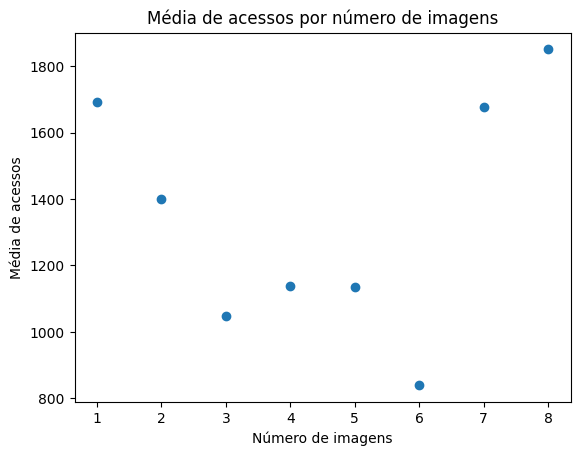

In [46]:
from matplotlib import pyplot

grouped = data[['acessos', 'imagens']].groupby('imagens').mean().reset_index()
grouped.columns = ['imagens', 'media_acessos']

pyplot.xlabel('Número de imagens')
pyplot.ylabel('Média de acessos')
pyplot.title('Média de acessos por número de imagens')
pyplot.scatter(x=grouped['imagens'], y=grouped['media_acessos'])
